In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def z_score(df: pd.DataFrame, col_name: str):
    # _col = df[col_name]
    # _mean = _col.mean()
    # _std = _col.std()
    # df[col_name] = (_col - _mean) / _std
    return df

In [2]:
data = pd.read_csv('../data/preprocessed/no_dup_13_series.csv')
data

,日期,柜员号,尾箱余额,在/离行,是否开启循环
0,2016-02-01,9012,600,在行,是
1,2016-02-02,9012,504000,在行,是
2,2016-02-03,9012,467300,在行,是
3,2016-02-04,9012,382200,在行,是
4,2016-02-05,9012,298700,在行,是
...,...,...,...,...,...
5195,2017-03-02,9490,163300,在行,是
5196,2017-03-03,9490,215500,在行,是
5197,2017-03-04,9490,241100,在行,是
5198,2017-03-05,9490,266400,在行,是


In [3]:
X1 = {i: z_score(g, '尾箱余额')['尾箱余额'] for i, g in data.groupby('柜员号')}
list(X1.values())[1]

3600    173300
3601    173300
3602    169600
3603    139700
3604    194000
         ...  
3995    374700
3996    330200
3997    316800
3998    300700
3999    260900
Name: 尾箱余额, Length: 400, dtype: int64

In [4]:
k_list = range(2, 13)
inertia_list = []
sil_list = []
for k in k_list:
    model = KMeans(n_clusters=k)
    _X = np.array(list(X1.values()))
    model.fit(_X)
    inertia_list.append(model.inertia_)
    sil_list.append(silhouette_score(_X, model.labels_))

C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

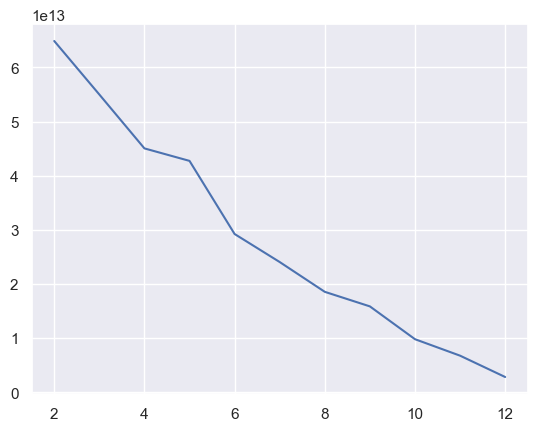

In [5]:
plt.plot(k_list, inertia_list)

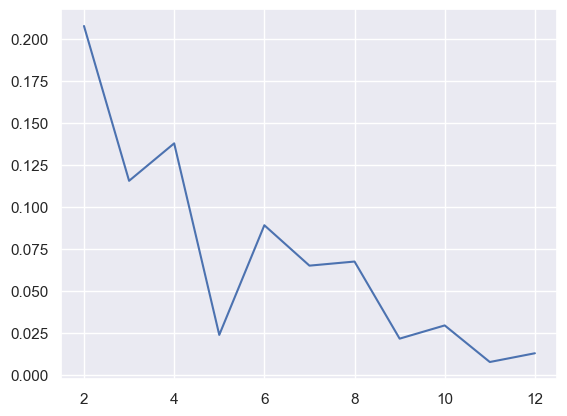

In [6]:
plt.plot(k_list, sil_list)

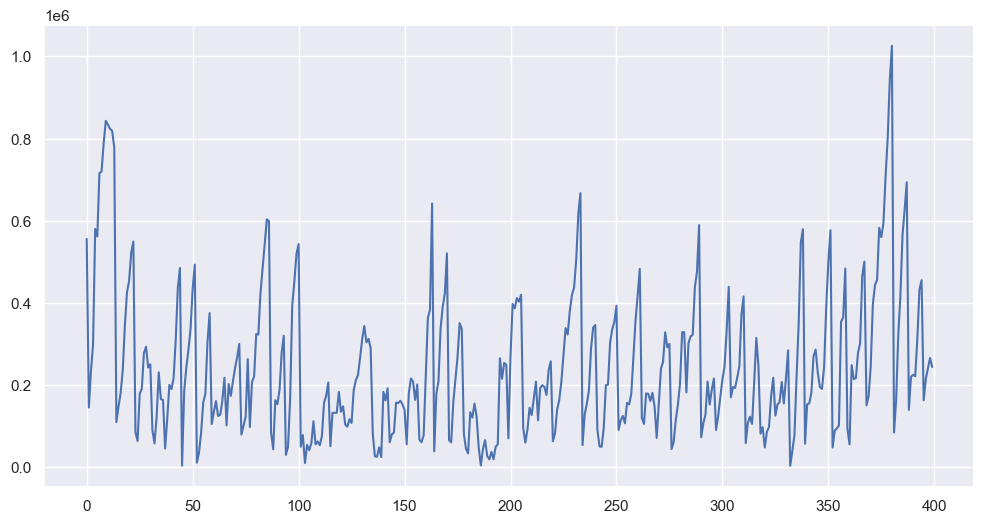

In [27]:
plt.figure(figsize=(12, 6))
for s in list(X1.values())[12:13]:
    s.reset_index(drop=True).plot()

<Axes: >

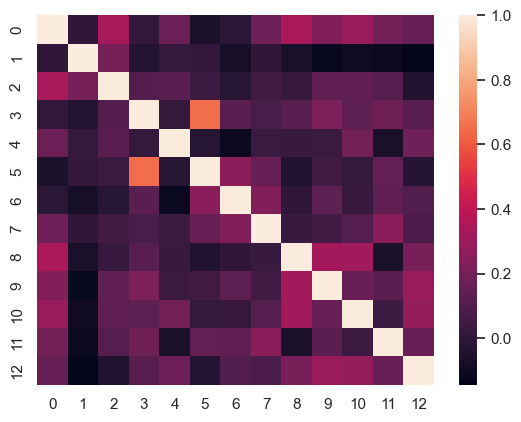

In [8]:
sns.heatmap(pd.DataFrame(np.array(list(X1.values())).T).corr())

In [9]:
sil_list2 = []
for k in k_list:
    model2 = AgglomerativeClustering(n_clusters=k)
    _X = np.array(list(X1.values()))
    model2.fit(_X)
    sil_list2.append(silhouette_score(_X, model2.labels_))

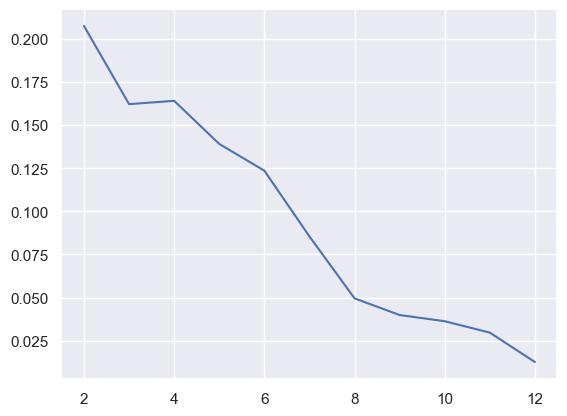

In [10]:
plt.plot(k_list, sil_list2)

In [11]:
model = KMeans(n_clusters=5)
model.fit(_X)

model2 = AgglomerativeClustering(n_clusters=4)
model2.fit(_X)

C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AgglomerativeClustering(n_clusters=4)

In [12]:
pd.Series(model.labels_, index=X1.keys()).rename('kmeans cluster').sort_values()

9008    0
9053    0
9077    0
9472    0
9490    1
9003    2
9012    2
9200    2
9025    3
9049    3
9039    4
9164    4
9207    4
Name: kmeans cluster, dtype: int32

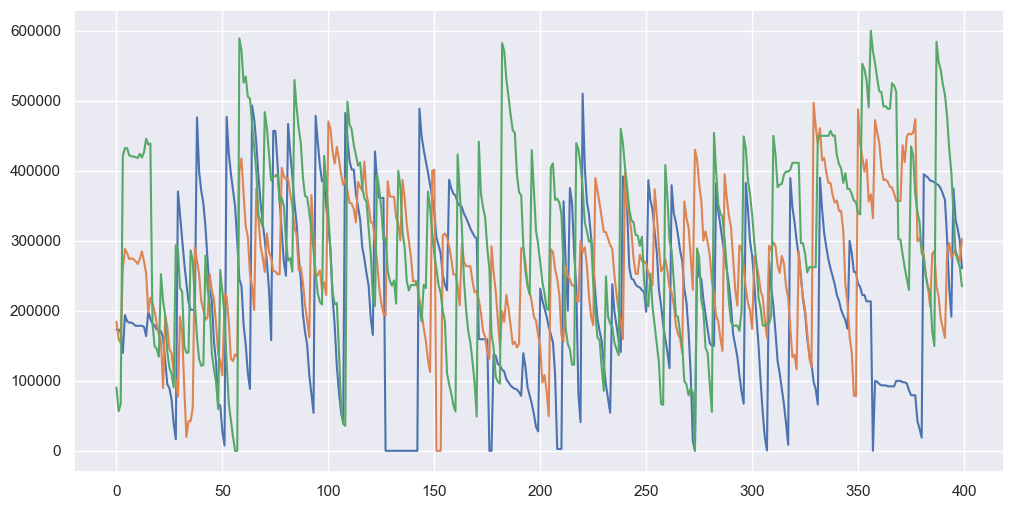

In [16]:
plt.figure(figsize=(12, 6))
for i in [9008, 9053, 9077]:
    X1[i].reset_index(drop=True).plot()

In [14]:
pd.Series(model2.labels_, index=X1.keys()).rename('agg cluster').sort_values()

9003    0
9008    0
9012    0
9039    0
9164    0
9200    0
9207    0
9025    1
9049    1
9053    2
9077    2
9472    2
9490    3
Name: agg cluster, dtype: int64